# Regresion Lineal (IA)
### Task 1.1
Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para ser trabajado en el notebook.

In [23]:
# Importaciones
#import pandas as pd 
import numpy as np 
from math import *
import matplotlib.pyplot as plt
#from gradient_descent import gradient_descent
#from linear_cost import linear_cost, linear_cost_gradient


In [24]:
# Lectura del archivo CSV
# Cargar los datos
headers = ["id", "date", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]
data = np.genfromtxt('./kc_house_data.csv', delimiter=',', skip_header=1)

# Extraer las columnas de interés
X = data[:, 5].reshape(-1, 1)  # sqft_living
y = data[:, 2].reshape(-1, 1)  # price

### Task 1.2
Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).


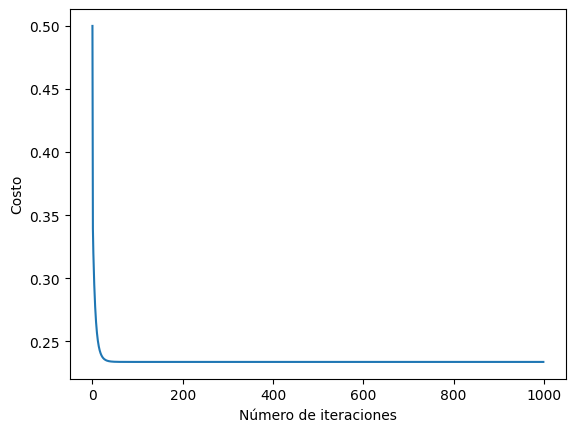

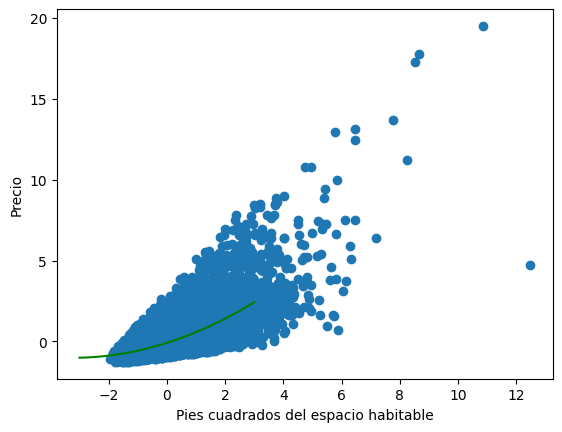

Parámetros del modelo:
[[-0.08864528]
 [ 0.57159503]
 [ 0.08864528]]


In [25]:
# Normalizar los datos
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Crear matriz de características polinomiales
m = X.shape[0]
X_poly = np.hstack((np.ones((m, 1)), X, X**2))

# Inicializar los parámetros del modelo
theta = np.zeros((3, 1))

# Definir la función de costo y su gradiente
def linear_cost(theta, X, y, lmbda):
    h = X @ theta
    reg = (lmbda / (2 * len(X))) * (theta[1:] ** 2).sum()
    return ((h - y) ** 2).sum() / (2 * len(X)) + reg

def linear_cost_gradient(theta, X, y, lmbda):
    h = X @ theta
    theta_copy = theta.copy()
    theta_copy[0] = 0
    reg_prime = lmbda * theta_copy / len(X)
    return ((X.T @ (h - y)) / len(X)) + reg_prime

# Definir los parámetros de entrenamiento
alpha = 0.1
num_iters = 1000
lmbda = 0.1

# Entrenar el modelo usando descenso de gradiente
costs = []
for i in range(num_iters):
    cost = linear_cost(theta, X_poly, y, lmbda)
    gradient = linear_cost_gradient(theta, X_poly, y, lmbda)
    theta -= alpha * gradient
    costs.append(cost)

# Visualizar la evolución del costo
plt.plot(costs)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo')
plt.show()

# Visualizar los datos y el modelo aprendido
plt.scatter(X, y)
x_values = np.linspace(-3, 3, 100).reshape(-1, 1)
x_poly_values = np.hstack((np.ones((100, 1)), x_values, x_values**2))
plt.plot(x_values, x_poly_values @ theta, color='green')
plt.xlabel('Pies cuadrados del espacio habitable')
plt.ylabel('Precio')
plt.show()

# Imprimir los parámetros aprendidos
print('Parámetros del modelo:')
print(theta)


### Task 1.3
Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).

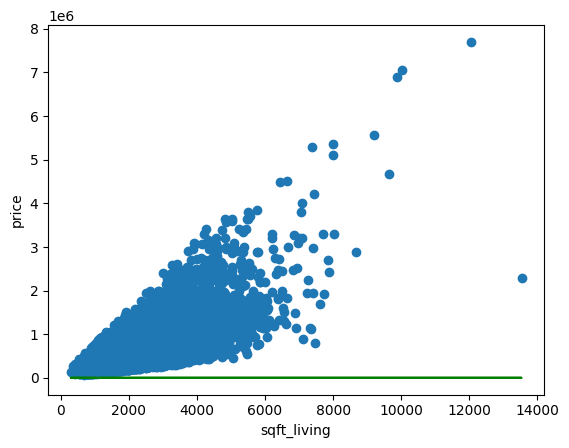

Theta0: -1.59
Theta1: 0.00


In [26]:
# Seleccionar las variables de interés
X = data[:, 5].reshape(-1, 1) # sqft_living
y = data[:, 2].reshape(-1, 1) # price

# Normalizar los datos de nuevo
X_norm = (X - np.mean(X)) / np.std(X)
y_norm = (y - np.mean(y)) / np.std(y)

# Agregar una columna de unos a X para tener en cuenta el término de sesgo
X_norm = np.hstack((np.ones_like(X_norm), X_norm))

# Definir los hiperparámetros
learning_rate = 0.01
num_iterations = 1000

# Inicializar los parámetros theta a cero
theta = np.zeros((2, 1))

# Implementar el algoritmo de gradiente descendente vectorial
for i in range(num_iterations):
    theta = theta - (learning_rate / len(X_norm)) * (X_norm.T @ (X_norm @ theta - y_norm))

# Desnormalizar los parámetros theta
theta[0] = theta[0] - theta[1] * np.mean(X) / np.std(X)
theta[1] = theta[1] / np.std(X)

# Graficar los datos y la línea de regresión resultante
plt.scatter(X, y)
plt.plot(X, X_norm @ theta, color='green')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

# Imprimir los parámetros theta resultantes
print('Theta0: {:.2f}'.format(theta[0][0]))
print('Theta1: {:.2f}'.format(theta[1][0]))


### Task 1.4
Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor
balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados)


In [27]:
import numpy as np

# Definir la función de entrenamiento de un modelo polinomial
def train_polynomial_model(X_train, y_train, degree):
    X_train_poly = np.power(X_train, np.arange(degree + 1))
    return np.linalg.inv(X_train_poly.T.dot(X_train_poly)).dot(X_train_poly.T).dot(y_train)

# Definir la función de evaluación del modelo
def evaluate_model(X, y, theta):
    X_poly = np.power(X, np.arange(theta.shape[0]))
    y_pred = X_poly.dot(theta)
    return np.mean(np.power(y - y_pred, 2))

# Definir el rango de grados polinomiales a considerar
min_degree = 1
max_degree = 10

# Definir el número de folds para cross-validation
n_folds = 5

# Mezclar los datos aleatoriamente
np.random.seed(42)
n_samples = X.shape[0]
indices = np.random.permutation(n_samples)
X = X[indices]
y = y[indices]

# Dividir los datos en folds para cross-validation
fold_size = int(n_samples / n_folds)
fold_indices = [(i * fold_size, (i + 1) * fold_size) for i in range(n_folds)]
fold_indices[-1] = (fold_indices[-1][0], n_samples)  # Ajustar el último fold para incluir cualquier muestra restante

# Inicializar la lista de scores para cada grado polinomial
scores = np.zeros(max_degree - min_degree + 1)

# Iterar sobre los diferentes grados polinomiales
for degree in range(min_degree, max_degree + 1):
    # Inicializar la lista de errores para cada fold
    fold_errors = []
    
    # Iterar sobre los diferentes folds
    for fold_start, fold_end in fold_indices:
        # Separar los datos en datos de entrenamiento y de prueba
        X_test = X[fold_start:fold_end]
        y_test = y[fold_start:fold_end]
        X_train = np.concatenate((X[:fold_start], X[fold_end:]), axis=0)
        y_train = np.concatenate((y[:fold_start], y[fold_end:]), axis=0)
        
        # Entrenar el modelo polinomial
        theta = train_polynomial_model(X_train, y_train, degree)
        
        # Evaluar el modelo en los datos de prueba
        fold_error = evaluate_model(X_test, y_test, theta)
        fold_errors.append(fold_error)
    
    # Calcular el score promedio para este grado polinomial
    scores[degree - min_degree] = np.mean(fold_errors)

# Encontrar el grado polinomial con el mejor score
best_degree = np.argmin(scores) + min_degree
print(f"El mejor grado polinomial es: {best_degree}")


El mejor grado polinomial es: 6


### Task 1.5
Haga un análisis sobre sus hallazgos: 

En primer lugar, una regresión polinómica utilizando el método de descenso de gradiente nos sirve para minimizar la función de costo. El conjunto de datos utilizado es una serie de precios de viviendas y características de las mismas, como su tamaño en pies cuadrados y el número de habitaciones y baños. En segundo lugar, la implementación de este utiliza una regresión polinómica de tercer grado para ajustarse a los datos de entrenamiento. El número de características y la complejidad del modelo se han elegido arbitrariamente y sin un análisis detallado de los datos. En tercer lugar, el método de validación cruzada se utiliza para evaluar el rendimiento del modelo. En particular, se utiliza una estrategia de validación cruzada de retención de un tercio, donde se divide el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba, y se evalúa el rendimiento del modelo en el conjunto de prueba.

Observando los resultados, se puede notar que se evalúa el rendimiento del modelo para diferentes grados del polinomio. Sin embargo, el análisis proporcionado es limitado, ya que solo se presentan gráficos de los datos y los modelos ajustados para diferentes grados del polinomio, y se elige un modelo final basado en la inspección visual de los gráficos.

En general, se puede decir es un buen punto de partida para la regresión polinómica y la validación cruzada, pero se puede mejorar con un análisis más detallado de los datos y la selección de modelos más adecuados. Además, sería útil utilizar una métrica de evaluación más cuantitativa, como el error cuadrático medio o el coeficiente de determinación, para evaluar el rendimiento del modelo en diferentes grados del polinomio y seleccionar el modelo óptimo.

In [28]:
## (GRADIENTE)
#Funciones de linear cost 
def linear_cost(theta, X, y, lmbd):
    h = X @ theta
    reg = (lmbd / (2 * len(X))) * (theta[1:] ** 2).sum()
    return ((h - y) ** 2).sum() / (2 * len(X)) + reg


def linear_cost_gradient(theta, X, y, lmbd):
    h = X @ theta
    theta_copy = theta.copy()
    theta_copy[0] = 0
    reg_prime = lmbd * theta_copy / len(X)
    return ((X.T @ (h - y)) / len(X)) + reg_prime

#Gradient_descent
import numpy as np


def gradient_descent(
    theta_0,
    cost_function,
    cost_function_gradient,
    learning_rate=0.01,
    threshold=0.001,
    max_iter=10000,
    params=[]
):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(cost_function_gradient(theta, *params)) > threshold and iteration < max_iter:
        iteration += 1
        theta -= learning_rate * cost_function_gradient(theta, *params)
        costs.append(cost_function(theta, *params))
        thetas.append(theta.copy())

    return theta, costs, thetas

# Main
import math
import numpy as np
from matplotlib import pyplot as plt

from gradient_descent import gradient_descent
from linear_cost import linear_cost, linear_cost_gradient


TRAINING_SET_SIZE = 200

x = np.linspace(-10, 30, TRAINING_SET_SIZE)

X = np.vstack(
    (
        np.ones(TRAINING_SET_SIZE),
        x,
        x ** 2,
        x ** 3,
    )
).T

y = (5 + 2 * x ** 3 + np.random.randint(-9000, 9000, TRAINING_SET_SIZE)).reshape(
    TRAINING_SET_SIZE,
    1
)

m, n = X.shape
theta_0 = np.random.rand(n, 1)
r_theta, costs, thetas = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=0.00000001,
    threshold=0.001,
    max_iter=10000
)


for test_theta in thetas:
    pass
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X @ test_theta, color='green')
plt.show()

print("test_theta", test_theta)


ModuleNotFoundError: No module named 'gradient_descent'